# Optical Properties of DH21 Astrodust
This notebook demonstrates how to read the published Astrodust datafiles containing the dielectric function and cross sections.

In [1]:
import numpy as np
from scipy import interpolate
from astropy import units as u
from astropy.constants import c, h
import matplotlib.pyplot as plt
%matplotlib inline

## Dielectric Function
Read in and plot the dielectric function for Astrodust with a porosity of 0.2, no metallic Fe, and an axial ratio b/a = 0.5 (i.e., a 2:1 prolate spheroid)

In [2]:
(EeV, eps1m1, eps2) = np.genfromtxt('index_DH21Ad_P0.20_0.00_0.500', unpack=True, usecols=(0,3,4), skip_header=2)
eps1 = 1. + eps1m1 # Note file tabulates eps1 - 1

Convert energy in eV to wavelengh in microns.

In [3]:
lam = (c*h / (EeV*u.eV)).to(u.micron)

Plot the real and imaginary parts of the dielectric function as a function of wavelength. Compare to Figure 20.

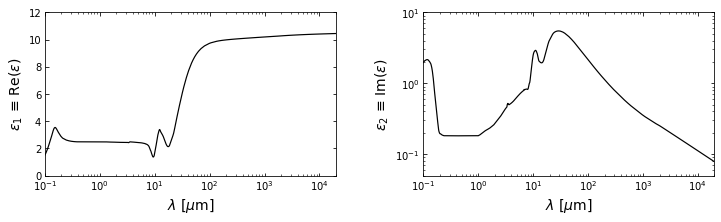

In [4]:
fig, ax = plt.subplots(1,2,figsize=(12., 3.))
plt.subplots_adjust(wspace=0.3)
ax[0].plot(lam, eps1, 'k-', linewidth=1.2)
ax[0].set_xlabel(r'$\lambda\ [\mu{\rm m}]$', size=14)
ax[0].set_ylabel(r'$\epsilon_1\, \equiv\, {\rm Re}\left(\epsilon\right)$', size=14)
ax[0].set_xscale('log')
ax[0].set_yscale('linear')
ax[0].axis([0.1, 2.e4, 0, 12])
ax[0].tick_params(axis='both', which='both', labelsize=10,
                 bottom=True, top=True, left=True, right=True,
                 direction='in')

ax[1].plot(lam, eps2, 'k-', linewidth=1.2)
ax[1].set_xlabel(r'$\lambda\ [\mu{\rm m}]$', size=14)
ax[1].set_ylabel(r'$\epsilon_2\, \equiv\, {\rm Im}\left(\epsilon\right)$', size=14)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].axis([0.1, 2.e4, 0.05, 10])
ax[1].tick_params(axis='both', which='both', labelsize=10,
                 bottom=True, top=True, left=True, right=True,
                 direction='in');

## Cross Sections
Read in and plot the dimensionless absorption, scattering and extinction cross sections for a 0.1um Astrodust grain with porosity of 0.2, no metallic Fe, and axial ratio of b/a = 0.5 (i.e., a 2:1 prolate spheroid). A simple method of interpolating in the datafiles will also be demonstrated.

In [5]:
# Read in the arrays of effective radius (a_eff) and wavelength
aeff = np.genfromtxt('DH21_aeff.dat',skip_header=2)
wave = np.genfromtxt('DH21_wave.dat',skip_header=2)

n_rad = len(aeff)
n_wav = len(wave)

# Read in the cross section matrix
data = np.genfromtxt('q_DH21Ad_P0.20_Fe0.00_0.500.dat',skip_header=12)
q_ext1 = data[0*n_wav:1*n_wav,:]
q_ext2 = data[1*n_wav:2*n_wav,:]
q_ext3 = data[2*n_wav:3*n_wav,:]

q_abs1 = data[3*n_wav:4*n_wav,:]
q_abs2 = data[4*n_wav:5*n_wav,:]
q_abs3 = data[5*n_wav:6*n_wav,:]

q_sca1 = data[6*n_wav:7*n_wav,:]
q_sca2 = data[7*n_wav:8*n_wav,:]
q_sca3 = data[8*n_wav:9*n_wav,:]

For simplicity, we will consider the cross sections of randomly-oriented grains, given by the mean of the three provided orientations

In [6]:
qext_ran = (q_ext1 + q_ext2 + q_ext3)/3.
qabs_ran = (q_abs1 + q_abs2 + q_abs3)/3.
qsca_ran = (q_sca1 + q_sca2 + q_sca3)/3.

Create 2D interpolation objects in terms of wavelength and grain radius.

In [7]:
qext_interp = interpolate.interp2d(aeff, wave, qext_ran, kind='cubic')
qabs_interp = interpolate.interp2d(aeff, wave, qabs_ran, kind='cubic')
qsca_interp = interpolate.interp2d(aeff, wave, qsca_ran, kind='cubic')

Evaluate at a grain size of 0.1 microns and plot as a function of wavelength.

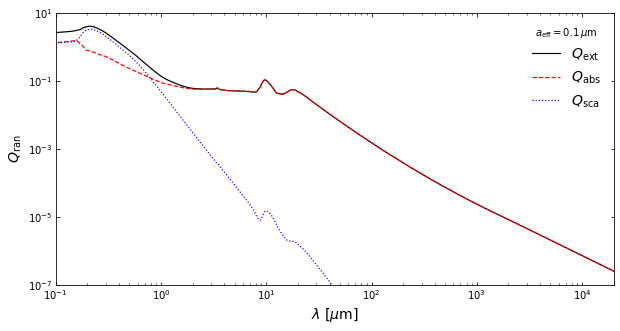

In [8]:
aeff = 0.1 # grain radius in microns
fig, ax = plt.subplots(1,1,figsize=(10., 5.))
ax.set_xlabel(r'$\lambda\ [\mu{\rm m}]$', size=14)
ax.set_ylabel(r'$Q_{\rm ran}$', size=14)
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([0.1, 2.e4, 1.e-7, 10.])
ax.tick_params(axis='both', which='both', labelsize=10,
                 bottom=True, top=True, left=True, right=True,
                 direction='in')

ax.plot(wave, qext_interp(aeff,wave), 'k-', linewidth=1.2, label=r'$Q_{\rm ext}$')
ax.plot(wave, qabs_interp(aeff,wave), 'r--', linewidth=1.2, label=r'$Q_{\rm abs}$')
ax.plot(wave, qsca_interp(aeff,wave), 'b:', linewidth=1.2, label=r'$Q_{\rm sca}$')


plt.legend(loc='upper right', prop={'size': 14}, frameon=False, 
           title=r'$a_{\rm eff}=0.1\,\mu{\rm m}$');